# NEUB CSE-432 Spring 2025 Lab 10

## Task 1
DFT by Divide and Conquer Approach

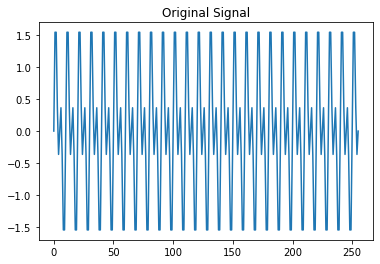

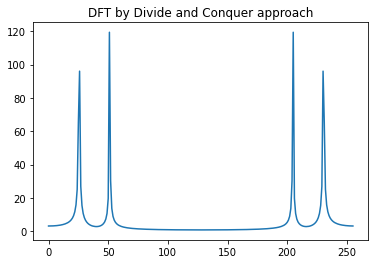

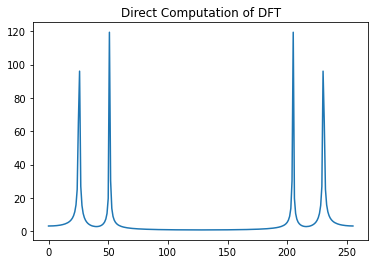

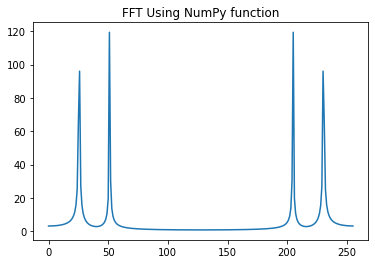

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Parameters
F1 = 100
F2 = 200
Fs = 1000
SL = 256
L = 8
M = 32
N = 256

#signal generation
s = np.zeros(SL)
for n in range(SL):
    s[n] = np.sin(2*np.pi*F1*n/Fs)+np.sin(2*np.pi*F2*n/Fs)

plt.figure()
plt.plot(s[0:SL])
plt.title("Original Signal")

x = np.reshape(s,(L,M),order='F') #Converting the signal from 1d array to 8x32 array
# print(x)


# Defining DFT function
def DFT(x,N):
    X = np.zeros(N,dtype = 'complex_')
    for k in range(N):
        for n in range(N):
            X[k] = X[k] + x[n]*np.exp(-1j*2*np.pi*k*n/N)
    return X


F = np.zeros((L,M),dtype = 'complex_')
for l in range(L):
    f = x[l,:]
    F[l,:]=DFT(f,M)
# print(F)

W = np.zeros((L,M),dtype = 'complex_')
for l in range(L):
    for q in range(M):
        W[l,q] = np.exp(-1j*2*np.pi*l*q/N)
# print(W)    

G = np.zeros((L,M),dtype = 'complex_')
G = W * F
#print(G)

X = np.zeros((L,M),dtype = 'complex_')
for q in range(M):
    g = G[:,q]
    X[:,q]=DFT(g,L)    
# print(X)

Y = np.reshape(X,(N,),order='C')
plt.figure()
plt.plot(abs(Y))
plt.title("DFT by Divide and Conquer approach")

#Direct Computation of DFT
plt.figure()
plt.plot(abs(DFT(s,N)))
plt.title("Direct Computation of DFT")

#Using FFT
Xp = np.fft.fft(s,N)
plt.figure()
plt.plot(abs(Xp))
plt.title("FFT Using NumPy function")

plt.show()


## Task 2
Moving Average Filter

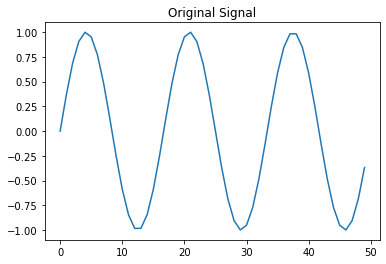

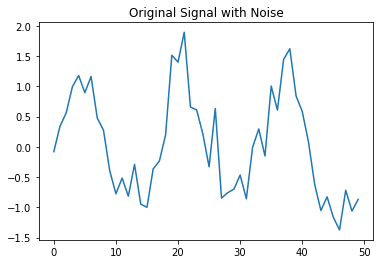

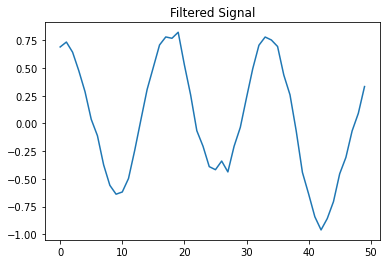

In [2]:
import numpy as np
import matplotlib.pyplot as plt

F = 3
Fs =50
L=100

x= np.zeros(L)
for n in range(L):
    x[n] = np.sin(2*np.pi*F*n/Fs)
plt.figure()
plt.plot(x[0:L//2])  
plt.title("Original Signal")

wn=np.random.normal(0,1,L)
wn=wn/np.max(wn)
y=x+wn
plt.figure()
plt.plot(y[0:L//2])
plt.title("Original Signal with Noise")

M=8
z=np.zeros(L)
# Moving average by summing in forward direction
for i in range(L-M):
    z[i]=sum(y[i:i+M])/M
plt.figure()
plt.plot(z[0:L//2])
plt.title("Filtered Signal")
plt.show()

## Task 3
Implemenmting moving average filter on random data

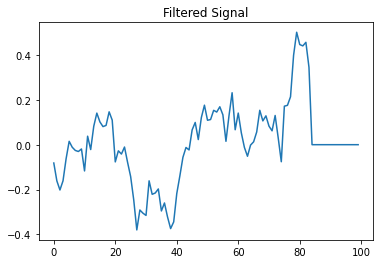

In [3]:
import numpy as np
import matplotlib.pyplot as plt

M=16
# data=[1, 5, 6, 10, 5, 10, 5 , 10 , 5,1, 5, 6, 10, 5, 10, 5 , 10 , 5,1, 5, 6, 10, 5, 10, 5 , 10 , 5,1, 5, 6, 10, 5, 10, 5 , 10 , 5,1, 5, 6, 10, 5, 10, 5 , 10 , 5,1, 5, 6, 10, 5, 10, 5 , 10 , 5,1, 5, 6, 10, 5, 10, 5 , 10 , 5]
data=np.random.normal(0,1,100)
z=np.zeros(len(data))
# Moving average by summing in forward direction
for i in range(len(data)-M):
    z[i]=sum(data[i:i+M])/M
plt.figure()
plt.plot(z)
plt.title("Filtered Signal")
plt.show()

## Home Tasks
1. Implementing Radix-2 FFT algorithm
2. Frequency analysis of a signal using different window filters
    a. Hanning
    b. Hamming
    
## Lab Final Details
* Lab Exam Date: 27th May 2025, Tuesday, 8:30 AM
* Project Submission Date: 29th May 2025, Thursday, 10:00 AM

## Marks Distribution
|Assessment|Mark|
|-----|----|
|Attendance|10|
|Lab Performance|20|
|Lab Final|40|
|Project + Viva|30|
|**Total**|**100**|